------
# Project: Problem Statement - Credit Card Customer Segmentation

# Introduction 

AllLife Bank wants to focus on its credit card customer base in the next financial year. 
They have been advised by their marketing research team, that the penetration in the market can be improved.
Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as 
upsell to existing customers. Another insight from the market research was that the customers perceive the support 
services of the back poorly. 
Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.




# Goals & Objective

All Life Bank wants to focus on its credit card customer base. The Marketing team proposes to run personalized campaigns 
to target new customers as well as upsell to existing customers. One of the insight from the market research was that the 
customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service
delivery model, to ensure that customer's queries are resolved faster.

To identify different segments in the existing customer based on their spending patterns as well as
past interaction with the bank.

In [1]:
# important librires 
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('Credit Card Customer Data (1).xlsx', index_col='Sl_No')

# The Data

There are 660 observations and 7 columns in the dataset.
All columns have 660 non-null values i.e. there are no missing values.



# Data Sample

The building block of any data science project is the data. Below you can find one data record which will be used in further analysis. The dataset consist of 660 samples describing the customers and it's behavior.


Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.



 <b>Customer key</b> - Identifier for the customer
 
 <b>Average Credit Limit</b> - Average credit limit across all the credit cards
 
 <b>Total credit cards</b> - Total number of credit cards
    
 <b>Total visits bank</b> - Total number of bank visits
    
 <b>Total visits online</b> - total number of online visits
    
 <b>Total calls made</b> - Total number of calls made by the customer
 
 
<b>Table of content</b>

- Part One: Exploratory Data Analysis
- Part Two: Univariate analysis 
- Part Three: Bivariate analysis
- Part Four: K-means Clustering
- Part Five: Hierarchical Clustering
- Part Six: Key questions

In [2]:
# lets try to look the data
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
5,47437,100000,6,0,12,3


# Section 1

<a id="DataPreprocessing" ></a>
## Data Preprocessing EDA(Exploratry Data Analysis)
In this phase we'll quickly explore the data and remove/impute incorrect values if we have. So that a cleaned data can be used for further analysis/modelling.
* Check for null values.
* Change the shape of data.
* Check for duplicates.
* Univariate Analysis
* Bivariate Analysis


In [3]:
# lets try to check the shape of data
df.shape

(660, 6)

In [4]:
# check the column names of data
print(df.columns.tolist())

['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']


In [5]:
# lets try to check the general information of all columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB


# Descriptive Anaylsis

In [6]:
# The## Exploratory Data Anaylsis describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types):
# number of non-missing values, mean, standard deviation,range, median, 0.25 and 0.75 quartiles. 
df.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


Since clustering methods use distance metrics I will create a scaled copy of the data.

In [7]:
# Standard Scaling to scale the data
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()
df_scaled[:] = StandardScaler().fit_transform(df_scaled)
df_scaled.drop('Customer Key', axis=1, inplace=True)
cols = list(df_scaled.columns)
df_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
1,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
2,0.410293,-0.787585,-1.473731,2.520519,1.891859
3,0.410293,1.058973,-0.860451,0.134290,0.145528
4,-0.121665,0.135694,-0.860451,-0.547490,0.145528
5,1.740187,0.597334,-1.473731,3.202298,-0.203739


# Data Visualization(EDA)

# Univariate Analysis
As we have only one type of variables and those are numaric Now we see Analysis on Numerical variables 

In [8]:
# important librires for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Average credit limit:

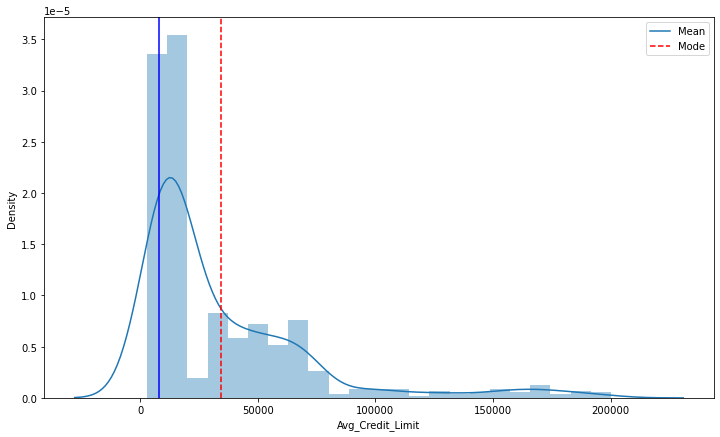

In [9]:
# Average credit limit majority of records do not have credit or have a low limit
plt.figure(figsize=(12,7))
sns.distplot(df.Avg_Credit_Limit);
mean=df['Avg_Credit_Limit'].mean()
mode=df['Avg_Credit_Limit'].mode().values[0]
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Mode':mode})

plt.show()

Average Credit Limit is between 10k to 20k and maximum limit of our credit card is 2 lac. And minimum limit of card is 5k.



### Total credit cards:

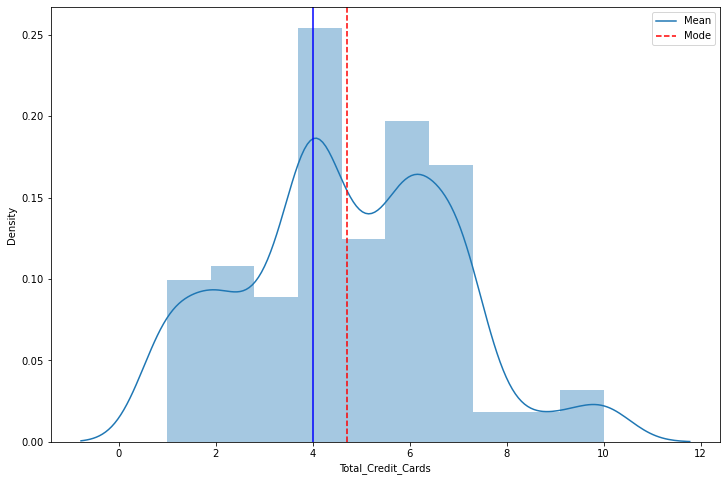

In [10]:
# Total credit cards Looks to be normally distributed. I can't help but wonder, why do some many users have more than one credit card?
plt.figure(figsize=(12,8))
sns.distplot(df.Total_Credit_Cards, bins=10);
mean=df['Total_Credit_Cards'].mean()
mode=df['Total_Credit_Cards'].mode().values[0]
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Mode':mode})
plt.show()

Looks to be normally distributed. The average of total_credit_cards are between 4 to 7. and maximum cards are 10. And Minimum Total_Credit_Card we have are 1 to 2.


### Total bank visits

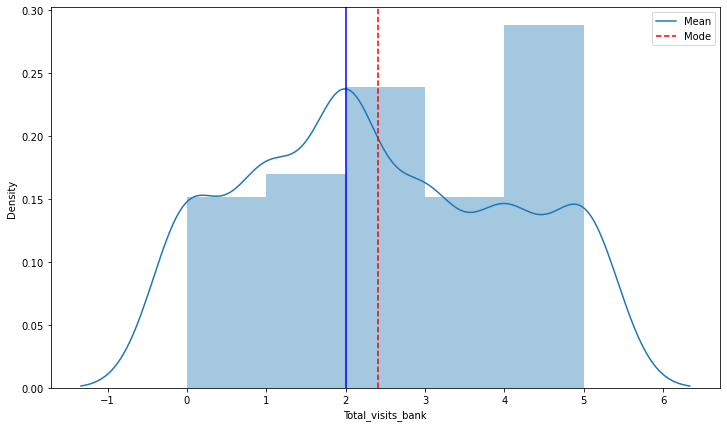

In [11]:
# Total bank visits Once again, normally distributed variable.
plt.figure(figsize=(12,7))
sns.distplot(df.Total_visits_bank, bins=5);

mean=df['Total_visits_bank'].mean()
mode=df['Total_visits_bank'].mode().values[0]
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Mode':mode})

plt.show()

Average number of calls made by the customer are between 1 to 5. And maximum number of calls made by the customer are almost 10. And minimum calls made near to 1 to 2.


### Total calls made:

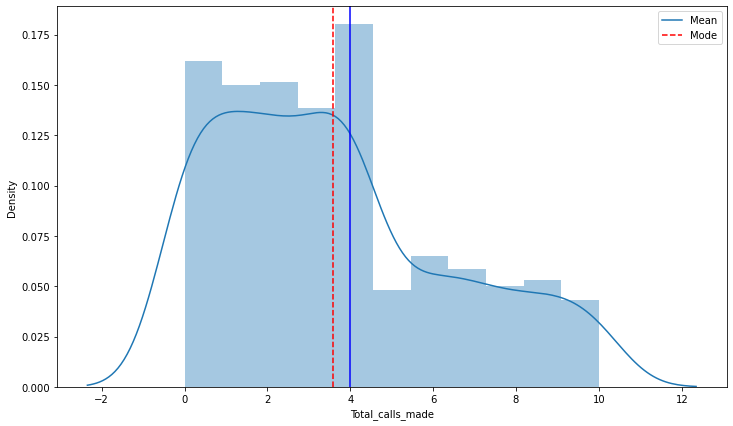

In [12]:
# Total calls made The total number of calls made by the customer.
plt.figure(figsize=(12,7))
sns.distplot(df.Total_calls_made);
mean=df['Total_calls_made'].mean()
mode=df['Total_calls_made'].mode().values[0]
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Mode':mode})
plt.show()

. Average number of people of visiting bank is between 2 to 4 times. And the maximum number of times customer visited the bank are are 5 times.


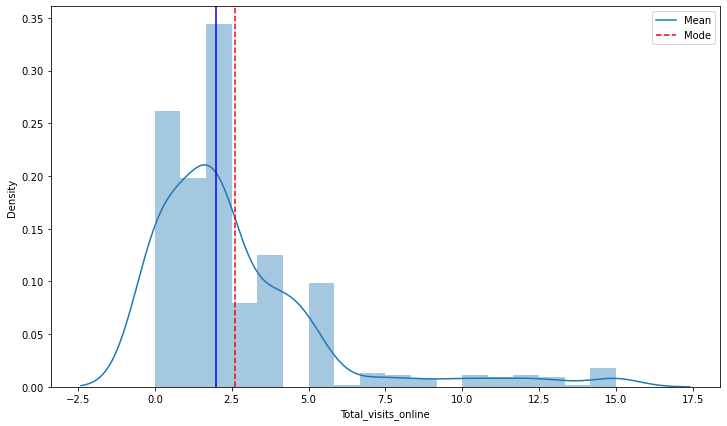

In [13]:
# Total_visits_online
plt.figure(figsize=(12,7))
sns.distplot(df.Total_visits_online, bins=18);
mean=df['Total_visits_online'].mean()
mode=df['Total_visits_online'].mode().values[0]
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Mode':mode})
plt.show()

Average number of calls made by the customer are between 1 to 5. And maximum number of calls made by the customer are almost 10. And minimum calls made near to 1 to 2.


# Bivariate Analysis

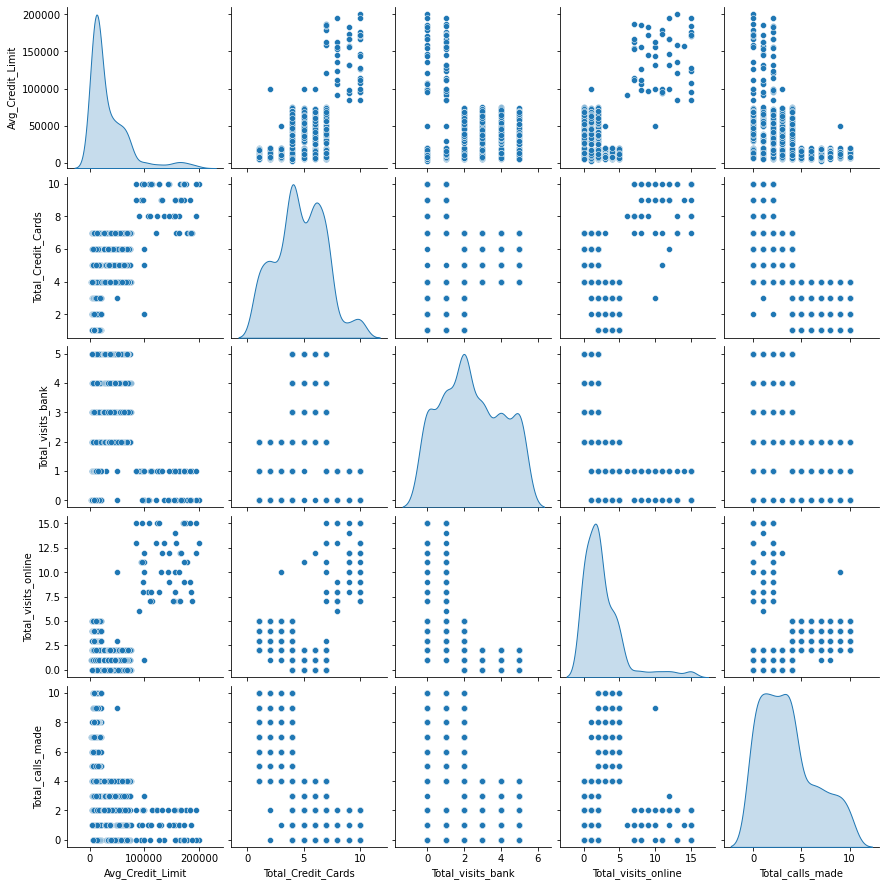

In [14]:
# The two bivariate plots below are useful to see what amount of feature interaction is present.
sns.pairplot(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']], diag_kind='kde');
plt.show()

We use the pair plot for bivariate Analysis.
As in first plot you see the Avg_credit_limit is between 100000 to 150000. 
And the avg_credit_card are between 5 to 8.
There are very low number of people who visit bank rather than making calls and online transactions.
Most of the people are sort there issues by making calls.





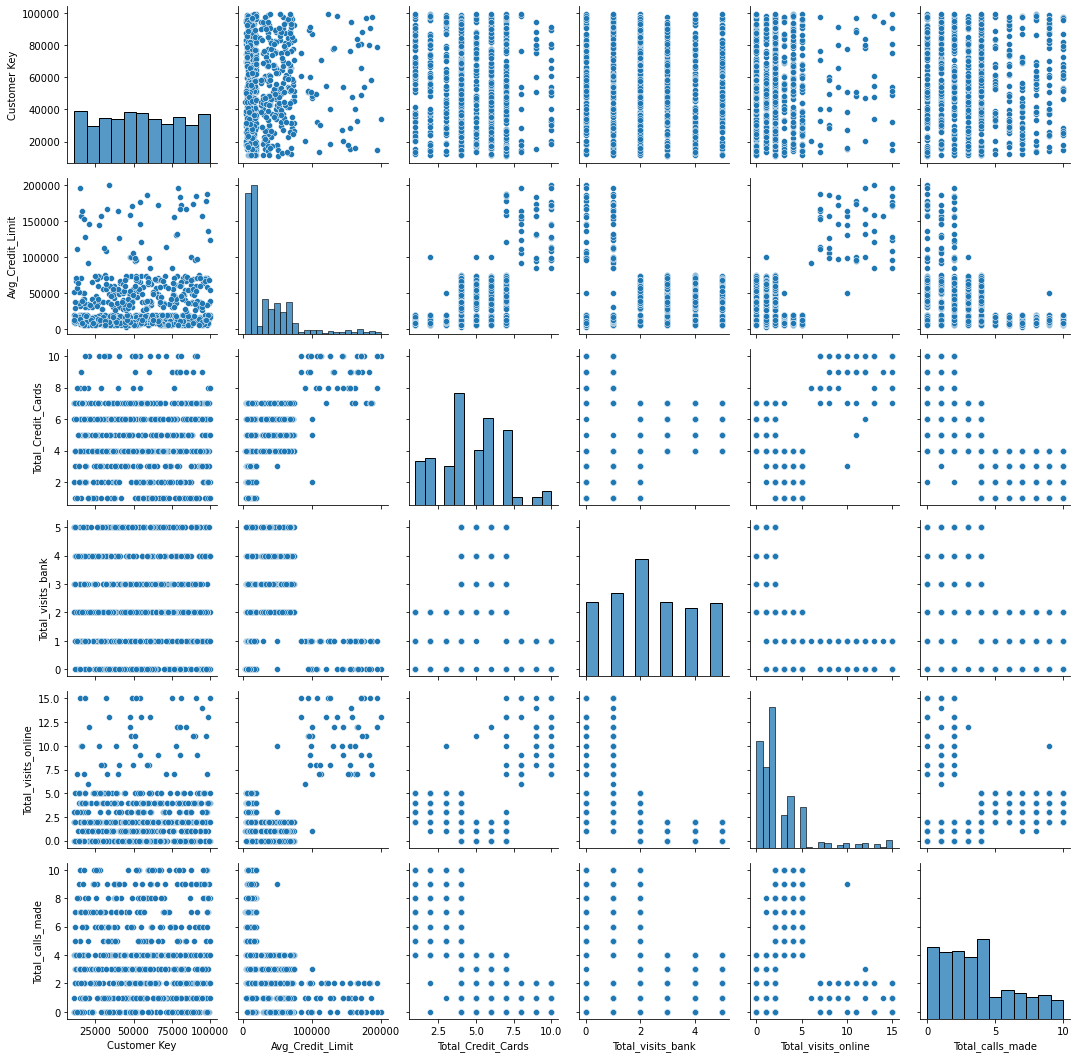

In [15]:
# pariGrid plot
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

# Ssection 2

Key meaningful observations on individual variables and the relationship between 
variables

- Correlation
- Histogram to observe indiviual variables

# Correlation

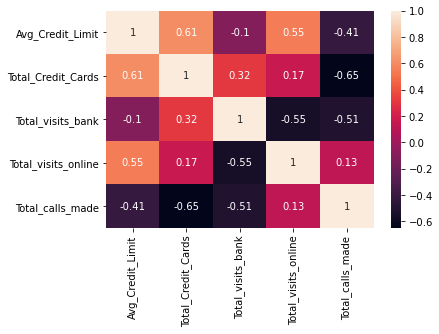

In [16]:
# Correlation
sns.heatmap(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].corr(), annot=True);

- Total credit cards and total visit online has medium positive correlation with average credit limit : 0.61,0.55 respectively. 
- Total credit cards and total visit bank has medium negative correlation with total calls made : -0.65,-0.5 respectively.
- Total visit online and medium negative correlation with total visit bank : -0.55.



### Contact method:
A hypothesis that I had going into this was that there would be three clusters for contact method, where customers would stick to their preferred method for interacting with their bank (online, in person, and through the phone).

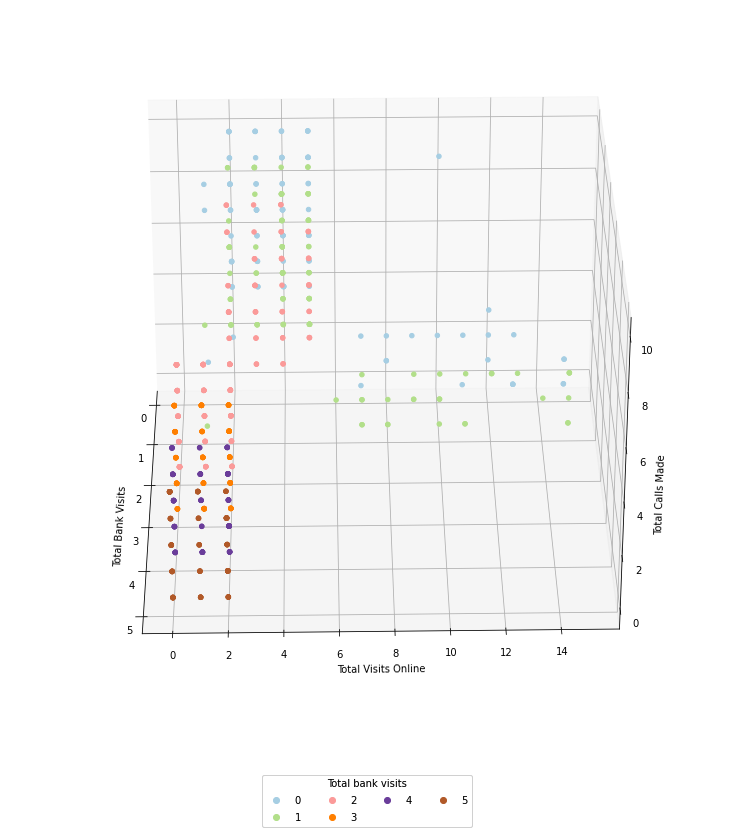

In [17]:
# Below we can see a 3D rotating scatter plot which shows my hypothesis was correct
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure(figsize=(10,10))

ax = Axes3D(fig)



x = df.Total_visits_bank
y = df.Total_visits_online
z = df.Total_calls_made


g = ax.scatter(x, y, z, c=x, marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('Total Bank Visits')
ax.set_ylabel('Total Visits Online')
ax.set_zlabel('Total Calls Made')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="lower center", title="Total bank visits", borderaxespad=-10, ncol=4)
ax.add_artist(legend)

# plt.show()

from matplotlib import animation

def rotate(angle):
     ax.view_init(azim=angle)

angle = 1
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=1)
ani.save('Cluster_plot.gif', writer=animation.PillowWriter(fps=25));

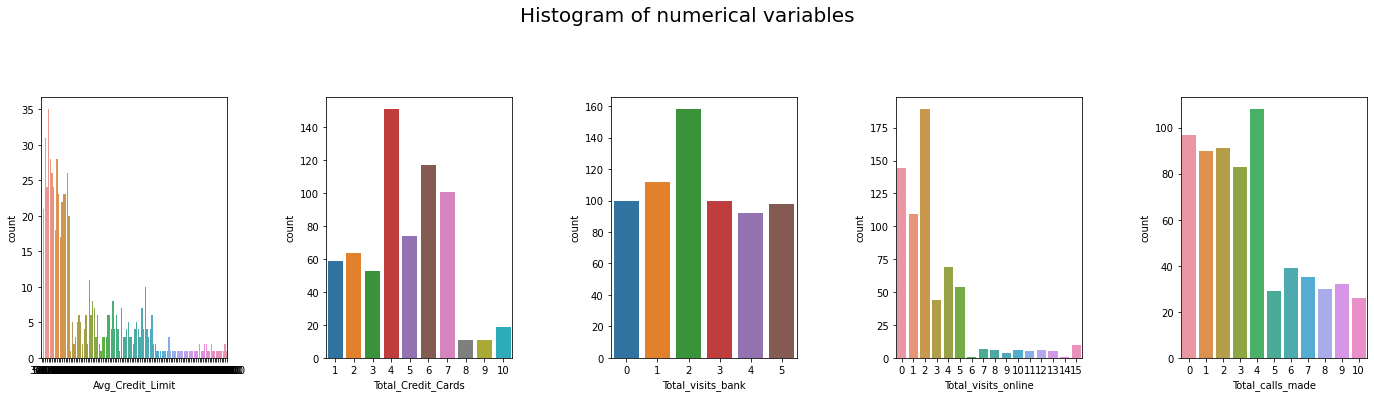

In [18]:
# histograms for individual variables
all_col = df.iloc[:,1:].columns.tolist()
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.countplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=4.0)

In [19]:
# statistics analysis on indivisual variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


# Inights form EDA

There are 660 observations and 7 columns in the dataset.
All columns have 660 non-null values i.e. there are no missing values.
All columns are of int64 data type.
There are no missing values.



Credit limit average is around 20K with 50% of customers having a 
credit limit less than 5K, which implies a high positive skewness.


On average, credit cards owned by each customer are ~4. Some customers have 10.
On average, most customer interactions are through calls, then online. Also, some customers never contacted/visited the bank.





Looking at standard deviation, we can see a considerably high variation in credit limits as well.
And in others columns like Total_Credit_Cards, Toal_visits_online and Total_calls_made have very low amount of variations in data.




Have a higher average credit limit and also seen that each customer have up to 8 to 10 credit cards to the maximum.
Therefore , the number of visits via online is higher but there visits to bank is lower .
The reason most of these customers get a higher income and they the spend more and so they rely more visits online for easier payments.
They seldom do calls or at the most 2 per day.








# Section 3
Data preprocessing


- Prepare the data for analysis
- Feature engineering 
- Missing value treatment
- Duplicate observations check


# Feature Engineering

In [20]:
# lets try to check the percentage of missing values,unique values,percentage of one catagory values 
# and type against each column.
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    ## Exploratory Data Anaylsis
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'percentage high one category values', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,percentage high one category values,type
0,Customer Key,655,0.0,0.303030,int64
1,Avg_Credit_Limit,110,0.0,5.303030,int64
2,Total_Credit_Cards,10,0.0,22.878788,int64
3,Total_visits_bank,6,0.0,23.939394,int64
4,Total_visits_online,16,0.0,28.636364,int64
5,Total_calls_made,11,0.0,16.363636,int64


In [21]:
# lets try to remove columns with percentage of high one category values and high missing values.
# Removing colums with 90% features with one category only and 90% features with missing values
good_cols = list(df.columns)
for col in df.columns:
    
    #remove columns with high NA rate
    na_rate = df[col].isnull().sum()/ df.shape[0]
    
    # remove columns with high Unbalanced values rate
    unbalanced_rate = df[col].value_counts(normalize=True, dropna=False).values[0]
    
    if na_rate > 0.9 and unbalanced_rate > 0.9:
        good_cols.remove(col) 

In [22]:
# extract a good columns
df2 = df[good_cols]

In [23]:
df2.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
5,47437,100000,6,0,12,3


# Missing values treatment

In [24]:
# lets try to check the missing values of each column in a dataset 
df.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

There is no missing value in our dataset

# checking the duplicate entries

### Customer Key and Sl_No
Initially, I believed that these two features were redundant, that Customer key was the intended primary key for a database but that Sl_No was generated when the data was added to a SQL like database but the user failed to explicitly state the primary key so a new one was generated. Strangely enough, the duplicate records for Customer Key don't match up, this may be that a record was added to the database when the intent was actually to update an existing record, another possibility may be that these are cases of identity theft, or possibly just joint accounts where the Customer Key is shared but not the Sl_No.

------
I now know that the duplicate entries are updated records, I will leave in the dataset for now as they consist of less than 1% of the total amount of data, they aren't outliers, and they will be useful for proving a point at the end of this project. 

In [25]:
#checking the duplicate entries for Customer Key
gb_df = df.groupby('Customer Key').count()
print('There are',gb_df.loc[gb_df.Total_calls_made >=2].shape[1], 'duplicate entries for Customer Key')

for k in list(gb_df.loc[gb_df.Total_calls_made >=2].index):
    display(df.loc[df['Customer Key'] == k])

There are 5 duplicate entries for Customer Key


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
49,37252,6000,4,0,2,8
433,37252,59000,6,2,1,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
5,47437,100000,6,0,12,3
333,47437,17000,7,3,1,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
412,50706,44000,4,5,0,2
542,50706,60000,7,5,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
392,96929,13000,4,5,0,0
399,96929,67000,6,2,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
105,97935,17000,2,1,2,10
633,97935,187000,7,1,7,0



# Section 4
- Applying K-means clustering
- Elbow Method
- Silhouette Metrics

<a id="part-two"></a>
## K-means


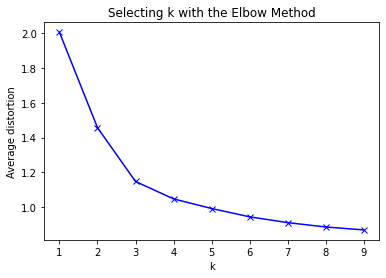

In [26]:
# First, we want to iterate through and view the performance of each value of K for K-means, then using a linegraph to 
# find the elbow of the plot we can select the optimal number of clusters.
from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist
meanDistortions=[]

for k in range(1, 10):
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])


plt.plot(range(1, 10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');
plt.show()

In [27]:
# kmeans clusters 
model = KMeans(n_clusters=3)
model.fit(df_scaled)
preds = model.predict(df_scaled)

In [28]:
# clearly Clusters distinguished
from sklearn.metrics import silhouette_score
labels = model.labels_
print('clearly Clusters distinguished are')
silhouette_score(df_scaled, labels, metric='euclidean')

clearly Clusters distinguished are


0.5157182558881063

In [29]:
# install this libriray to see the Silhouette Visualizer
# !pip install yellowbrick

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer

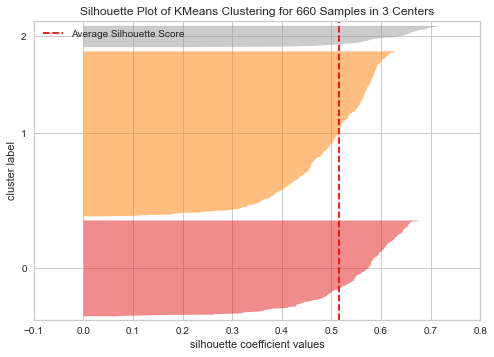

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(df_scaled)    
visualizer.show()

In [32]:
df['Kmean_grouping'] = preds #here we add the predictions to the unscaled data so that we can gain some real world interpretability.
df_scaled['Kmean_grouping'] = preds

df.groupby('Kmean_grouping').count()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Kmean_grouping,,,,,,
0,386,386,386,386,386,386
1,50,50,50,50,50,50
2,224,224,224,224,224,224


Below we see the average values for each feature in each cluster, the final row of the dataframe is the mean value for each column (since this data is unscaled we can use this to determine how big of a step each of these means is from one another).

It would appear my hypothesis of the clusters forming along query method has proven correct. If we look at the data we see that there is a group which prefers online interactions with their bank, they have a much higher credit limit and also have more credit cards. The customers who prefer in-person interactions tend to have the least number of credit cards and the lowest credit limit. The customers who contact via phonecall are in the middle.

One additional observation is that if we tally up the number of interactions per group (how many times they have used online, phone, or in-person services) we see the in-person customers appear to be the most active. This was the opposite of my initial expectations as visiting a bank in person has the highest friction (effort required) to complete. 
 

In [33]:
# Kmean_grouping
_ = df.groupby('Kmean_grouping').mean().append(pd.DataFrame(df.std()).T)
_.index = ['Phone', 'Online', 'In person', 'Mean']
_

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping
Phone,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,NaN
Online,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,NaN
In person,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,NaN
Mean,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317,0.930218


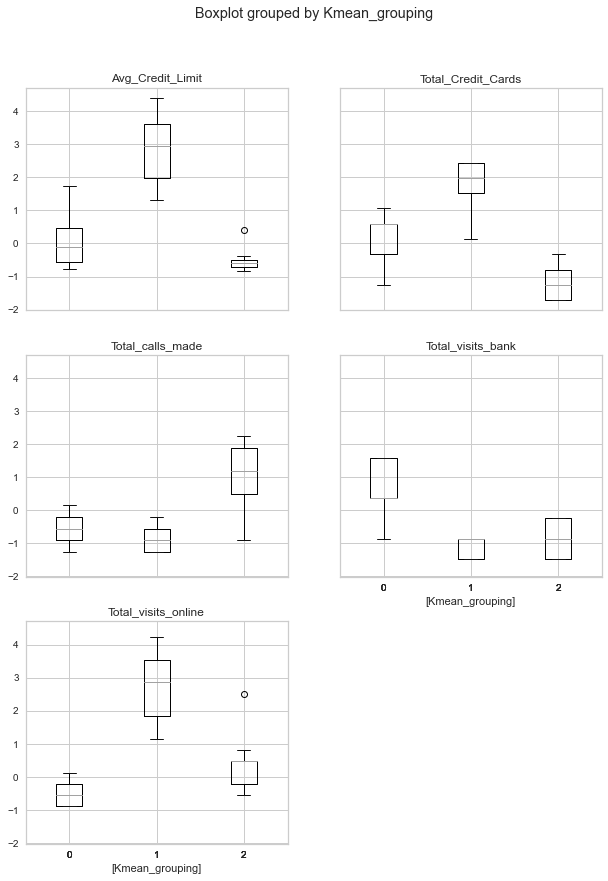

In [34]:
#BoxPlot Grouped by Kmean_grouping
df_scaled.boxplot(by='Kmean_grouping', layout=(3,2), figsize=(10,14));

In [35]:
# drop kmean_grouping
df_scaled.drop('Kmean_grouping', inplace=True, axis=1)

# Section 5
- Applying Hierarchical clustering
- Dendrogram
- Linkage

<a id="part-three"></a>
## Hierarchical Clustering

For hierarchical clustering, we begin by evaluating the cophenetic coefficients for each linkage type and also each affinity/metric. Below is a list of said outcomes, ignoring any combination that scores poorly, and ignoring any combination that will result in an error. It's worth noting that scipy has more options than sklearn does for metrics and linkages. While there are several good combinations, I will pick euclidean for the metric and average for linkage as these are options in both scipy and sklearn.

In [36]:
#  Below is a list of said outcomes, ignoring any combination that scores poorly, 
# and ignoring any combination that will result in an error.
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

links = ['ward', 'complete', 'average', 'single', 'weighted', 'centroid', 'median']
affs = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
        'cosine', 'dice', 'euclidean', 'hamming', 'jaccard',
        'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean']

for aff in affs:
    for link in links:
        if link == 'ward' and aff != 'euclidean':
            pass
        elif link == 'centroid' and aff != 'euclidean':
            pass
        elif link == 'median' and aff != 'euclidean':
            pass
        else:
            Z = linkage(df_scaled[cols], metric=aff, method=link)
            c, coph_dists = cophenet(Z , pdist(df_scaled[cols]))
            if c > .75:
                print('affinity:',aff, ', link:',link,':', c)

affinity: braycurtis , link: single : 0.8502845518924395
affinity: canberra , link: single : 0.7566178713003985
affinity: chebyshev , link: complete : 0.8533474836336782
affinity: chebyshev , link: average : 0.8974159511838106
affinity: chebyshev , link: weighted : 0.8913624010768603
affinity: cityblock , link: complete : 0.8731477899179829
affinity: cityblock , link: average : 0.896329431104133
affinity: cityblock , link: weighted : 0.8825520731498188
affinity: euclidean , link: complete : 0.8599730607972423
affinity: euclidean , link: average : 0.8977080867389372
affinity: euclidean , link: weighted : 0.8861746814895477
affinity: euclidean , link: centroid : 0.8939385846326323
affinity: euclidean , link: median : 0.8893799537016724
affinity: mahalanobis , link: average : 0.8326994115042136
affinity: mahalanobis , link: weighted : 0.7805990615142518
affinity: minkowski , link: complete : 0.8599730607972423
affinity: minkowski , link: average : 0.8977080867389372
affinity: minkowski , 

Next, I need to decide on the number of clusters. There are two methods I use here to reach my conclusion, the first plot shows the silhouette score by the number of clusters. Based on this I would not want more than 4 clusters as the score gets too low. The second plot is the dendrogram, which plots the merging of the groups base on distance. The dendrogram shows a long distance (the y axis) for the two final groups and each of the subsequent groups has a drastically shorter distance. This would suggest to me that there are two distinct groups under this method. 

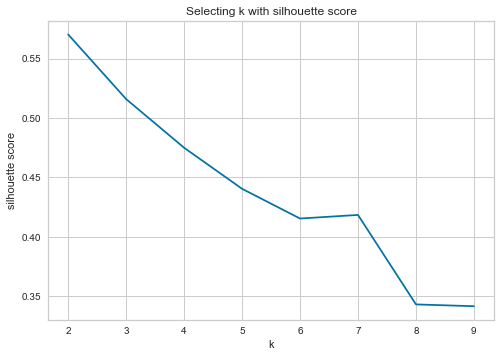

In [37]:
# need to decide on the number of clusters AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

meanDistortions=[]

for k in range(2, 10):
    model=AgglomerativeClustering(n_clusters=k, affinity='euclidean',  linkage='average')
    model.fit(df_scaled)
    prediction=model.labels_
    meanDistortions.append(silhouette_score(df_scaled, prediction))


plt.plot(range(2, 10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Selecting k with silhouette score');
plt.show()

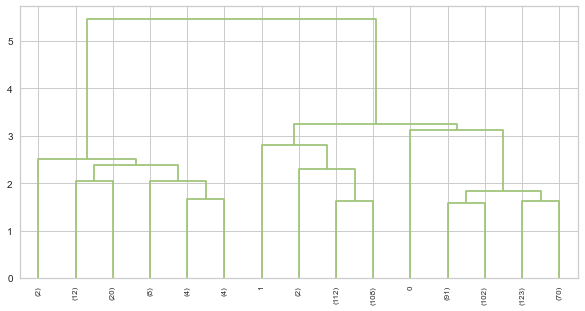

In [38]:
Z = linkage(df_scaled[cols], metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_scaled[cols]))
plt.figure(figsize=(10, 5))

dendrogram(Z, p=15, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.)
plt.show()

This method resulted in two clusters, with one cluster containing only 8% of the total records. It is also worth noting that the online user segment matches the same online user segment from Kmeans. Interestingly enough this division seems to be the users who prefer internet transactions and those who do not. Once again, online users have more credit cards and a larger credit limit.

Not shown below: when using 3, 4, 5, or 6 clusters, all but two of the clusters have less than five records. Obviously, such clusters don't provide meaningful data. 


In [39]:
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
model.fit(df_scaled)
preds=model.labels_
df['hc_grouping'] = preds
df_scaled['hc_grouping'] = preds

df.groupby('hc_grouping').count()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping
hc_grouping,,,,,,,
0,610,610,610,610,610,610,610
1,50,50,50,50,50,50,50


# Section 6

- Cluster Profiles

In [40]:
_ = df.groupby('hc_grouping').mean().append(pd.DataFrame(df.std()).T)
_.index=['Offline','Online', 'Mean']
_

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping,hc_grouping
Offline,55012.97541,25847.540984,4.375410,2.550820,1.926230,3.788525,0.734426,NaN
Online,56708.76000,141040.000000,8.740000,0.600000,10.900000,1.080000,1.000000,NaN
Mean,25627.77220,37625.487804,2.167835,1.631813,2.935724,2.865317,0.930218,0.264811


Cluster Profiles:

- Group 0:
    - Customers with minimum credit limits (~ 25K in average).
    - They also have the least average number of credit cards (~ 4 cards each).
    - They tend to make phone calls rather than online and bank visits.

- Group 1:
    - Customers with middle credit limits (~ 141K in average).
    - They also have the middle average number of credit cards(~ 8 cards each).
    - They tend to visit the bank more often rather than making calls and online transactions.



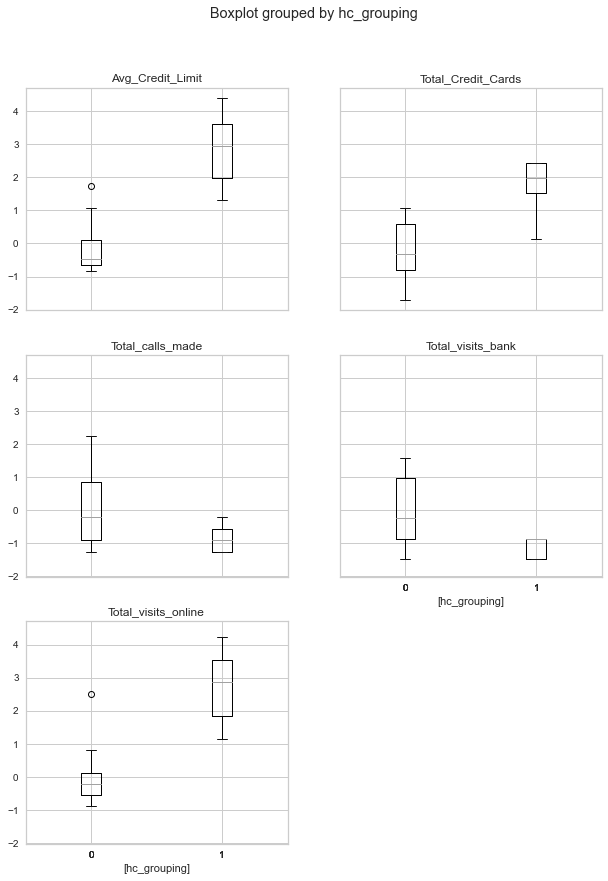

In [41]:
df_scaled.boxplot(by='hc_grouping', layout=(3,2), figsize=(10,14));

# Section 7
 - Key Questions
 - Insights and Recommendataions

<a id="part-four"></a>
## Key Questions

    How many different segments of customers are there?
    How are these segments different from each other?
    What are your recommendations to the bank on how to better market to and service these customers?
    
Arguably, there are three distinct categories of customers:
* In-person users: prefer to handle bank transactions in person. They have the fewest credit cards and the lowest available credit. They are also the most active users.
* Phone users: prefer verbally handling transactions remotely.
* Online users: prefer digital transactions. They also have the most credit cards and the highest available credit.

We can tailor contact methods to these customer preferences. Online/phone users will probably prefer email/text notifications, while in-person users mail prefer mail notifications and upselling (when at the bank location). Since online users tend to have (and presumably use) the most credit, these may be the demographic we want to target with our next ad campaign, focusing on digit recruiting.
 


#  All key insights and recommendations

Business can offer better phone service to these customers as they are a sizeable percentage of population. 
Feedback on service delivery can be requested from customers to improve perception of delivery. 
New customers could be added to this category by offering cards with low credit limit. 
They can be offered more credit cards as their credit card utilization is low.

Business can offer better in person service to these customers as they are a sizeable percentage of population. 
They can be offered more information about online banking for some services, keeping their convenience in mind.

Business can look to add more customers in this category, as this cluster is a small percentage of the customers population.

Business can contact these customers to offer credit cards or to get feedback about service.

We can tailor contact methods to these customer preferences. Online/phone users will probably prefer email/text notifications,
while in-person users mail prefer mail notifications and upselling (when at the bank location). 
Since online users tend to have (and presumably use) the most credit, these may be the demographic we want to target with our 
next ad campaign, focusing on digit recruiting.


# State vs Trait

When trying to serve a customer it is important to understand whether a characteristic is a state or a trait. 
A state is a characteristic that can change over time, for instance, a person can be illiterate as a state, but if they choose
to overcome such a weakness they can change. A trait is something which is unchanging, for instance, if a person is left-handed
they can try to learn to use their non-dominant hand but they won't be able to attain the same level of mastery with it as their
dominant hand.

Below we have 5 sets of records for customers with entries that have changed over time, we can see that in three of the five 
cases customers have moved from one cluster to another. Since this is the case one possible choice is to incentivize customers
to change to a more desirable class. As a possible example, we may want more customers to switch to digital, as they are more 
engaged (have more visits) and have more credit cards. Another possible option is to start monitoring usage that indicates a 
state change so that we can change contact methods accordingly for their preferences.

In [42]:
gb_cccd = df.groupby('Customer Key').count()
print('There are',gb_cccd.loc[gb_cccd.Total_calls_made >=2].shape[0], 'duplicate entries for Customer Key')

for k in list(gb_cccd.loc[gb_cccd.Total_calls_made >=2].index):
    display(df.loc[df['Customer Key'] == k])

There are 5 duplicate entries for Customer Key


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping,hc_grouping
Sl_No,,,,,,,,
49,37252,6000,4,0,2,8,2,0
433,37252,59000,6,2,1,2,0,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping,hc_grouping
Sl_No,,,,,,,,
5,47437,100000,6,0,12,3,1,1
333,47437,17000,7,3,1,0,0,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping,hc_grouping
Sl_No,,,,,,,,
412,50706,44000,4,5,0,2,0,0
542,50706,60000,7,5,2,2,0,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping,hc_grouping
Sl_No,,,,,,,,
392,96929,13000,4,5,0,0,0,0
399,96929,67000,6,2,2,2,0,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping,hc_grouping
Sl_No,,,,,,,,
105,97935,17000,2,1,2,10,2,0
633,97935,187000,7,1,7,0,1,1
